In [1]:
import torch

In [2]:
!git clone https://github.com/marijal74/ml_pix2pix.git

fatal: destination path 'ml_pix2pix' already exists and is not an empty directory.


In [3]:
from ml_pix2pix.src.discriminator import Discriminator
from ml_pix2pix.src.generator import UNet
from ml_pix2pix.src.process_data import ImageDataset, Pix2PixDataset
from ml_pix2pix.src import process_data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from ml_pix2pix.src import utils
import multiprocessing

In [4]:
pix2pix_dataset = Pix2PixDataset.FACADES
print("Which dataset:" + pix2pix_dataset.value)
print("Dataset url:" + pix2pix_dataset.get_url())
print("Batch size: {}, epochs: {}".format(pix2pix_dataset.batch_size(), pix2pix_dataset.num_epochs()))

Which dataset:facades
Dataset url:http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Pix2PixDataset.FACADES
Batch size: 1, epochs: 200


In [5]:
process_data.download_dataset(pix2pix_dataset)

In [6]:
batch_size = pix2pix_dataset.batch_size()
epochs = pix2pix_dataset.num_epochs()

Pix2PixDataset.FACADES


In [7]:
num_threads = multiprocessing.cpu_count()

In [8]:
test_dataset = ImageDataset(pix2pix_dataset)
test_dataset.load_dataset()

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle = True, num_workers=num_threads)

In [9]:
disc_state_dict_50 = torch.load('/content/drive/MyDrive/saved_models/facades/facades_discriminator_dict.pth')
gen_state_dict_50 = torch.load('/content/drive/MyDrive/saved_models/facades/facades_generator_dict.pth')

disc_state_dict_75 = torch.load('/content/drive/MyDrive/saved_models/facades/facades_discriminator_dict_75.pth')
gen_state_dict_75 = torch.load('/content/drive/MyDrive/saved_models/facades/facades_generator_dict_75.pth')

disc_state_dict_100 = torch.load('/content/drive/MyDrive/saved_models/facades/facades_discriminator_dict_100.pth')
gen_state_dict_100 = torch.load('/content/drive/MyDrive/saved_models/facades/facades_generator_dict_100.pth')

## $\lambda = 50$

In [10]:
discriminator = Discriminator(num_channels=3)
generator = UNet()

In [11]:
discriminator.load_state_dict(disc_state_dict_50)
discriminator.eval()

Discriminator(
  (model): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
  )
)

In [12]:
generator.load_state_dict(gen_state_dict_50)
generator.eval()

UNet(
  (input): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down4): Sequential(
    (0): Conv2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


In [13]:
data = []
for i, (inputs, targets) in enumerate(test_dataloader):
  if i > 10:
    break
  data.append((inputs, targets))

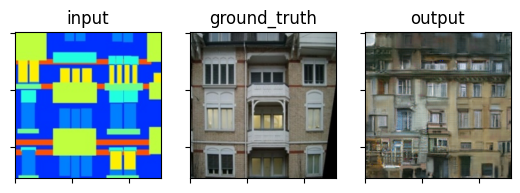

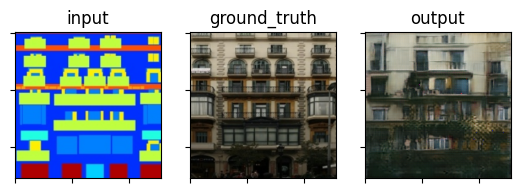

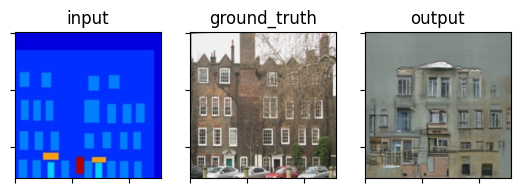

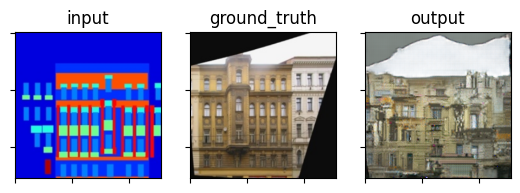

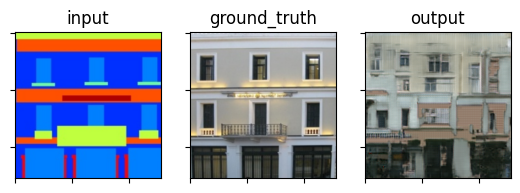

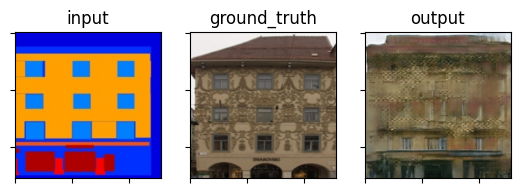

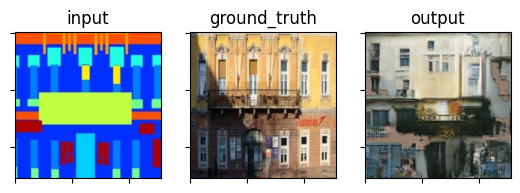

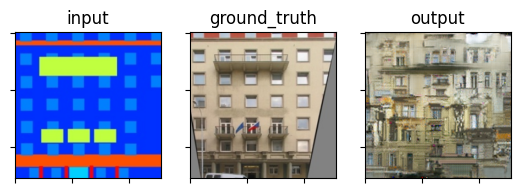

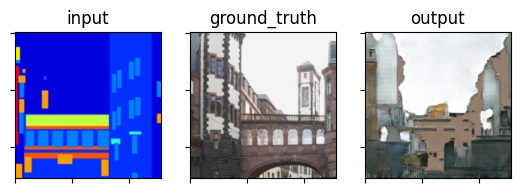

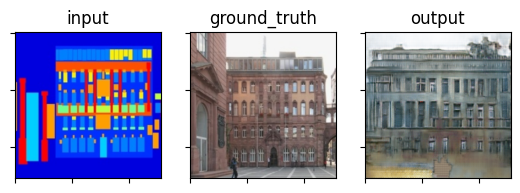

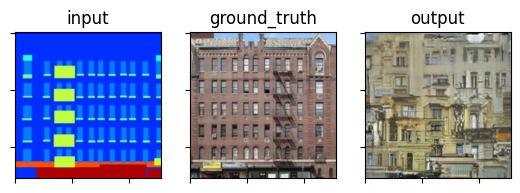

In [14]:
for (inputs, targets) in data:
  gen = generator(inputs)
  utils.print_sample(inputs[0], targets[0], gen)

## $\lambda = 75$

In [15]:
discriminator.load_state_dict(disc_state_dict_75)
discriminator.eval()

generator.load_state_dict(gen_state_dict_75)
generator.eval()

UNet(
  (input): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down4): Sequential(
    (0): Conv2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


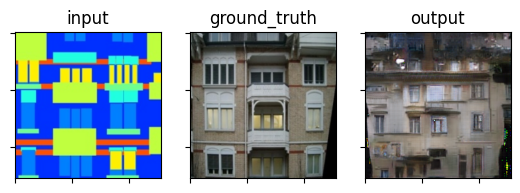

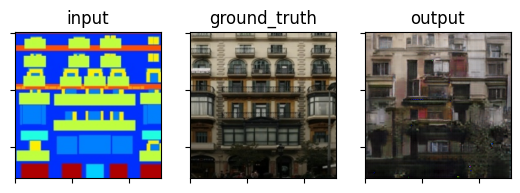

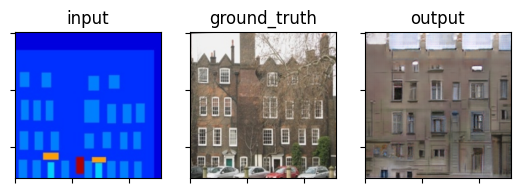

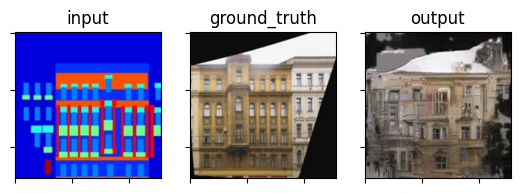

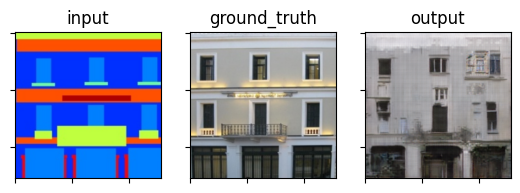

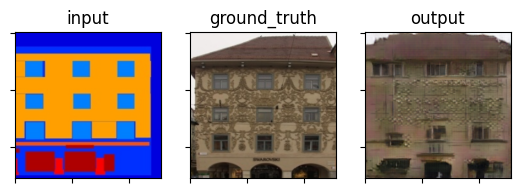

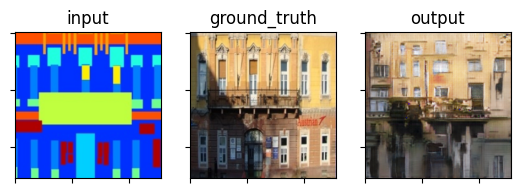

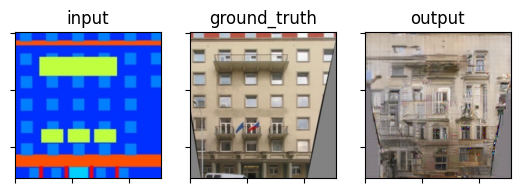

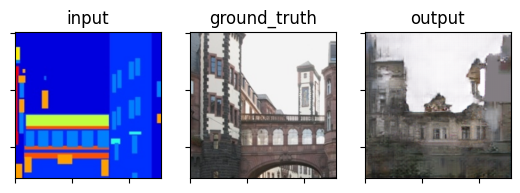

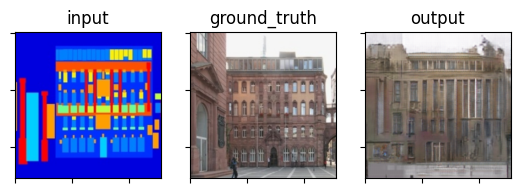

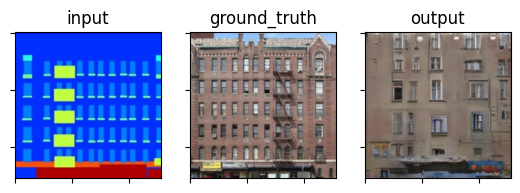

In [16]:
for (inputs, targets) in data:
  gen = generator(inputs)
  utils.print_sample(inputs[0], targets[0], gen)

In [17]:
discriminator.load_state_dict(disc_state_dict_100)
discriminator.eval()

generator.load_state_dict(gen_state_dict_100)
generator.eval()

UNet(
  (input): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (down4): Sequential(
    (0): Conv2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


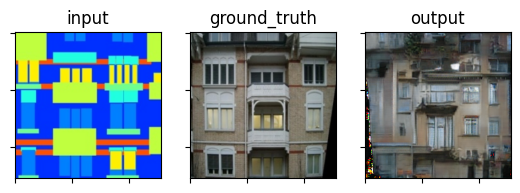

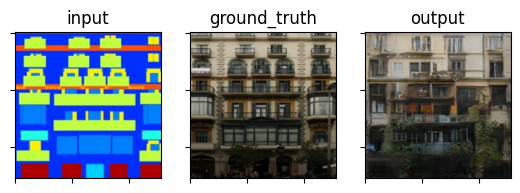

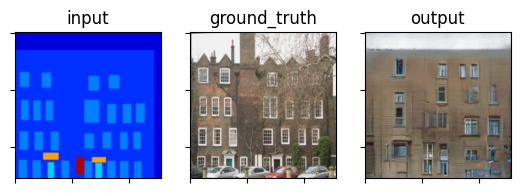

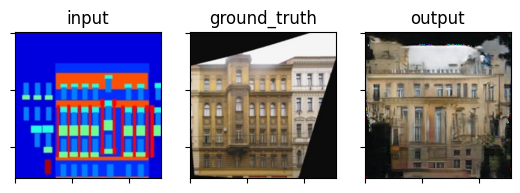

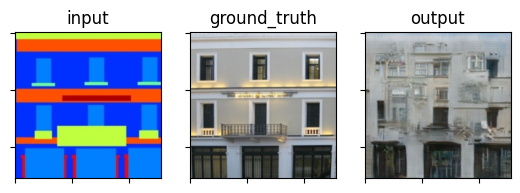

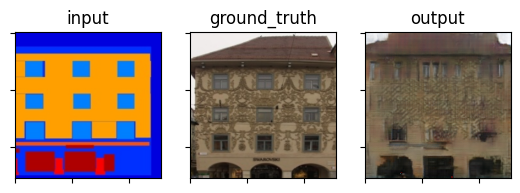

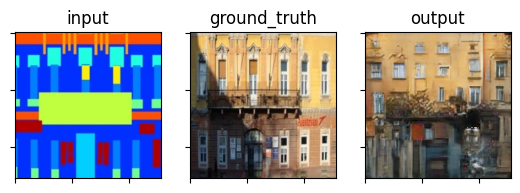

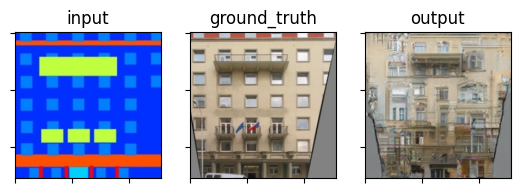

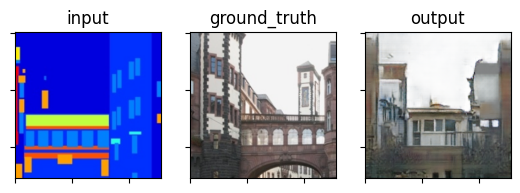

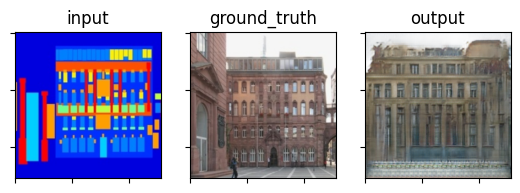

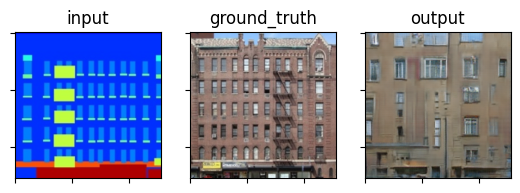

In [18]:
for (inputs, targets) in data:
  gen = generator(inputs)
  utils.print_sample(inputs[0], targets[0], gen)

In [19]:
print("Discriminator (lambda = 50) state dictionary keys:")
print(disc_state_dict_50.keys())
print("Generator (lambda = 50) state dictionary keys:")
print(gen_state_dict_50.keys())

Discriminator (lambda = 50) state dictionary keys:
odict_keys(['model.0.weight', 'model.2.weight', 'model.3.weight', 'model.3.bias', 'model.3.running_mean', 'model.3.running_var', 'model.3.num_batches_tracked', 'model.5.weight', 'model.6.weight', 'model.6.bias', 'model.6.running_mean', 'model.6.running_var', 'model.6.num_batches_tracked', 'model.8.weight', 'model.9.weight', 'model.9.bias', 'model.9.running_mean', 'model.9.running_var', 'model.9.num_batches_tracked', 'model.11.weight'])
Generator (lambda = 50) state dictionary keys:
odict_keys(['input.0.weight', 'input.0.bias', 'down1.0.weight', 'down1.0.bias', 'down1.1.weight', 'down1.1.bias', 'down1.1.running_mean', 'down1.1.running_var', 'down1.1.num_batches_tracked', 'down2.0.weight', 'down2.0.bias', 'down2.1.weight', 'down2.1.bias', 'down2.1.running_mean', 'down2.1.running_var', 'down2.1.num_batches_tracked', 'down3.0.weight', 'down3.0.bias', 'down3.1.weight', 'down3.1.bias', 'down3.1.running_mean', 'down3.1.running_var', 'down3.1.

In [20]:
print("Discriminator (lambda = 75) state dictionary keys:")
print(disc_state_dict_75.keys())
print("Generator (lambda = 75) state dictionary keys:")
print(gen_state_dict_75.keys())

Discriminator (lambda = 75) state dictionary keys:
odict_keys(['model.0.weight', 'model.2.weight', 'model.3.weight', 'model.3.bias', 'model.3.running_mean', 'model.3.running_var', 'model.3.num_batches_tracked', 'model.5.weight', 'model.6.weight', 'model.6.bias', 'model.6.running_mean', 'model.6.running_var', 'model.6.num_batches_tracked', 'model.8.weight', 'model.9.weight', 'model.9.bias', 'model.9.running_mean', 'model.9.running_var', 'model.9.num_batches_tracked', 'model.11.weight'])
Generator (lambda = 75) state dictionary keys:
odict_keys(['input.0.weight', 'input.0.bias', 'down1.0.weight', 'down1.0.bias', 'down1.1.weight', 'down1.1.bias', 'down1.1.running_mean', 'down1.1.running_var', 'down1.1.num_batches_tracked', 'down2.0.weight', 'down2.0.bias', 'down2.1.weight', 'down2.1.bias', 'down2.1.running_mean', 'down2.1.running_var', 'down2.1.num_batches_tracked', 'down3.0.weight', 'down3.0.bias', 'down3.1.weight', 'down3.1.bias', 'down3.1.running_mean', 'down3.1.running_var', 'down3.1.

In [21]:
print("Discriminator (lambda = 100) state dictionary keys:")
print(disc_state_dict_100.keys())
print("Generator (lambda = 100) state dictionary keys:")
print(gen_state_dict_100.keys())

Discriminator (lambda = 100) state dictionary keys:
odict_keys(['model.0.weight', 'model.2.weight', 'model.3.weight', 'model.3.bias', 'model.3.running_mean', 'model.3.running_var', 'model.3.num_batches_tracked', 'model.5.weight', 'model.6.weight', 'model.6.bias', 'model.6.running_mean', 'model.6.running_var', 'model.6.num_batches_tracked', 'model.8.weight', 'model.9.weight', 'model.9.bias', 'model.9.running_mean', 'model.9.running_var', 'model.9.num_batches_tracked', 'model.11.weight'])
Generator (lambda = 100) state dictionary keys:
odict_keys(['input.0.weight', 'input.0.bias', 'down1.0.weight', 'down1.0.bias', 'down1.1.weight', 'down1.1.bias', 'down1.1.running_mean', 'down1.1.running_var', 'down1.1.num_batches_tracked', 'down2.0.weight', 'down2.0.bias', 'down2.1.weight', 'down2.1.bias', 'down2.1.running_mean', 'down2.1.running_var', 'down2.1.num_batches_tracked', 'down3.0.weight', 'down3.0.bias', 'down3.1.weight', 'down3.1.bias', 'down3.1.running_mean', 'down3.1.running_var', 'down3.

In [22]:
total_params_discr = sum(p.numel() for p in discriminator.parameters())
print(f"Total number of parameters of a discriminator: {total_params_discr}")
total_params_gen = sum(p.numel() for p in generator.parameters())
print(f"Total number of parameters of a generator: {total_params_gen}")

Total number of parameters of a discriminator: 2768640
Total number of parameters of a generator: 54420483
